# Homework 3

In [111]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

## 1. Quadratic equations

In [ ]:
from math import sqrt

In [10]:
# Primera forma de calcular raíces

def quad_roots(a,b,c):
    Δ = b**2 - 4*a*c
    if Δ > 0:
        return [(-b + sqrt(Δ))/(2*a), (-b - sqrt(Δ))/(2*a)]
    elif Δ == 0:
        return -b/(2*a)
    else:
        return [complex((-b)/(2*a), sqrt(-Δ)/(2*a)), \
                complex((-b)/(2*a), -sqrt(-Δ)/(2*a)) ]

In [16]:
# Polinomio de coeficientes
coeff = [0.001,1000,0.001]

quad_roots(*coeff)

[-9.999894245993346e-07, -999999.999999]

In [11]:
# Segunda forma de calcular raíces

def quad_roots_alt(a,b,c):
    Δ = b**2 - 4*a*c
    if Δ > 0:
        return [2*c/(-b - sqrt(Δ)), 2*c/(-b + sqrt(Δ))]
    elif Δ == 0:
        return -2*c/b
    else:
        return [complex((-b)/(2*a), sqrt(-Δ)/(2*a)), \
                complex((-b)/(2*a), -sqrt(-Δ)/(2*a)) ]

In [18]:
quad_roots_alt(*coeff)

[-1.000000000001e-06, -1000010.5755125057]

**Usando la función $\texttt{roots}$ de la librería $\texttt{numpy}$.**

In [17]:
''' numpy.roots(p): Return the roots of a polynomial 
                    with coefficients given in p '''

np.roots(coeff)

array([-1.e+06, -1.e-06])

## 2. Calculating derivatives

De la definición de derivada
$$\dfrac{df}{dx} = \lim_{\delta \rightarrow 0} \dfrac{f(x+\delta) - f(x)}{\delta}$$
hacemos $\delta$ pequeño para calcular la derivada numéricamente.

In [19]:
# Definiendo función x
def func2(x):
    return x*(x-1)

def derivative_test(f, x, δ):
    return (f(x + δ) - f(x))/δ

In [20]:
x = 1
δ = 10**(-2)

derivative_test(func2, x, δ)

1.010000000000001

In [26]:
for i in range(4,16,2):
    δ = 10**(-i)
    der = derivative_test(func2, x, δ)
    print("La derivada de f en x=1 con delta {0:.1e} es {1: .10f} con error {2:.3e}".format(δ,der,abs(1-der)))

La derivada de f en x=1 con delta 1.0e-04 es  1.0001000000 con error 1.000e-04
La derivada de f en x=1 con delta 1.0e-06 es  1.0000009999 con error 9.999e-07
La derivada de f en x=1 con delta 1.0e-08 es  1.0000000039 con error 3.923e-09
La derivada de f en x=1 con delta 1.0e-10 es  1.0000000828 con error 8.284e-08
La derivada de f en x=1 con delta 1.0e-12 es  1.0000889006 con error 8.890e-05
La derivada de f en x=1 con delta 1.0e-14 es  0.9992007222 con error 7.993e-04


## 3. Heat capacity of a solid

La teoría de sólidos de Debye estima la capacidad calorífica de un sólido a temperatura $T$ como

$$C_V = 9V\rho k_B \left(\dfrac{T}{\theta_D}\right)^3 \int_0^{\theta_D /T} \dfrac{x^4 e^x}{(e^x - 1)^2} dx,$$

donde $V$ es el volumen del sólido, $\rho$ es la densidad de átomos, $k_B$ es la constante de Boltzmann y $\theta_D$ es la temperatura de Debye.

In [2]:
V = 1000e-6 #Volumen
ρ = 6.022e28 #Densidad de átomos
θ = 428 #Temperatura de Debye
k = 1.380649e-23 #Constante de Boltzmann

In [ ]:
from math import exp

In [3]:
# Integrando de C_V

def int_CV(x):
    if x > 0: 
        return (x**4 * exp(x))/(exp(x) - 1)**2
    else: 
        return 0

# Cálculo de C_V
# quad retorna un arreglo de valores
# de estos solo nos interesa el valor [0] de la integral

def CV(T):
    return 9*V*ρ*k*(T/θ)**3 * quad(int_CV,0,θ/T)[0] 

In [4]:
# Arrays

T = np.linspace(5,500,500)
CV_T = np.array([CV(t) for t in T])

[]

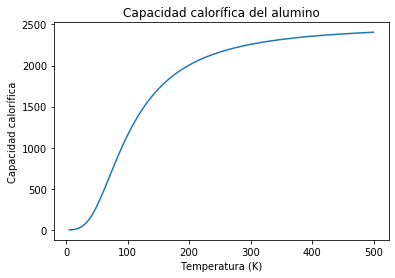

In [6]:
# Plot

fig, ax = plt.subplots()
ax.plot(T, CV_T, label=r'$C_V(T)$')
ax.set_xlabel("Temperatura (K)")
ax.set_ylabel("Capacidad calorífica")
ax.set_title("Capacidad calorífica del alumino")
plt.savefig("CV.pdf")
plt.plot()

## 5. Diffraction gratings

La intensidad en el patrón de difracción en la pantalla a una distancia $x$ desde el eje central del sistema está dada por:
$$I(x) = \left| \int_{-w/2}^{w/2} \sqrt{q(u)} e^{i2\pi xu/\lambda f}du \right|^2, $$

donde:

$\lambda$: Longitud de onda

$w$: Ancho de la rejilla de difracción

$f$: Distancia focal del lente

$q(u)$: Intensidad de transmisión a una distancia $u$ del eje central

Considerando $q(u) = \sin^2 \alpha u$. La separación entre las rendijas es tal que: $$\alpha u_n = \dfrac{2n+1}{2} \pi$$ 
Entonces $$d = u_{n+1} - u_n = \dfrac{\pi}{\alpha}$$

In [48]:
# Exponencial complejo
from math import sin, cos

In [75]:
d = 20e-6
π = np.pi
α = π/d

# Función intensidad de transmisión
def q(u):
    return (sin(α*u))**2

In [76]:
λ = 500e-9 # Longitud de onda
n = 10 #Número de slits
w = n*d
f = 1.0
x = np.linspace(-5e-2,5e-2,200)

In [77]:
def int_diff(x):
    integral_cos = quad(lambda u: sqrt(q(u))*cos(2*π*x*u/(λ*f)), -w/2, w/2)[0]
    integral_sin = quad(lambda u: sqrt(q(u))*sin(2*π*x*u/(λ*f)), -w/2, w/2)[0]
    aux = complex(integral_cos, integral_sin)
    return abs(aux)**2

In [78]:
int_x = np.array([int_diff(x) for x in x])

/home/alejandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  


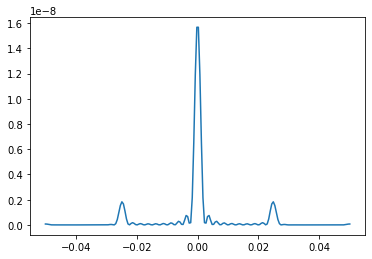

In [79]:
plt.plot(x, int_x)
plt.show()

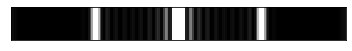

In [109]:
# Patrón de difracción
y = np.zeros((20,x.shape[0]))

for i in range(20):
    y[i,:] = int_x
    
plt.imshow(y,vmax=0.15e-8,cmap='gray')
plt.yticks([],[])
plt.xticks([],[])
plt.show()